In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import fastf1.plotting

session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (947.08 MB) /Users/diegomaradona/Library/Caches/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']


Vamos analisar a primeira curva no GP da Espanha e embbedar esses dados no LLM, para ver se o LLM consegue trazer informações sobre os dados

In [15]:
fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

circuit_info = session.get_circuit_info()


fastest_lap = session.laps.pick_driver(
    'VER').pick_fastest().get_car_data().add_distance()
# print(fastest_lap.keys())
fastest_lap = fastest_lap[['Distance', 'Speed']]
fastest_lap['Driver'] = session.get_driver('VER')['BroadcastName']

circuit_info = session.get_circuit_info()


fig = px.line(fastest_lap, x="Distance", y="Speed", color="Driver", title="Test", template="plotly_dark",
              labels=dict(Speed='Speed in km/h', Distance='Distance in meters'))

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    fig.add_vline(x=corner['Distance'], line_dash="dash", annotation=dict(
        text=txt), fillcolor="gray", opacity=0.2)
fig.show()

# print(fastest_lap)

In [11]:
fastest_lap.loc[(fastest_lap['Distance'] > 800) &
                (fastest_lap['Distance'] < 890)]

,Distance,Speed,Driver
40,811.260000,196,M VERSTAPPEN
41,823.541944,185,M VERSTAPPEN
42,835.341944,177,M VERSTAPPEN
43,846.808611,172,M VERSTAPPEN
44,857.808611,165,M VERSTAPPEN
45,868.875278,166,M VERSTAPPEN
46,880.075278,168,M VERSTAPPEN


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


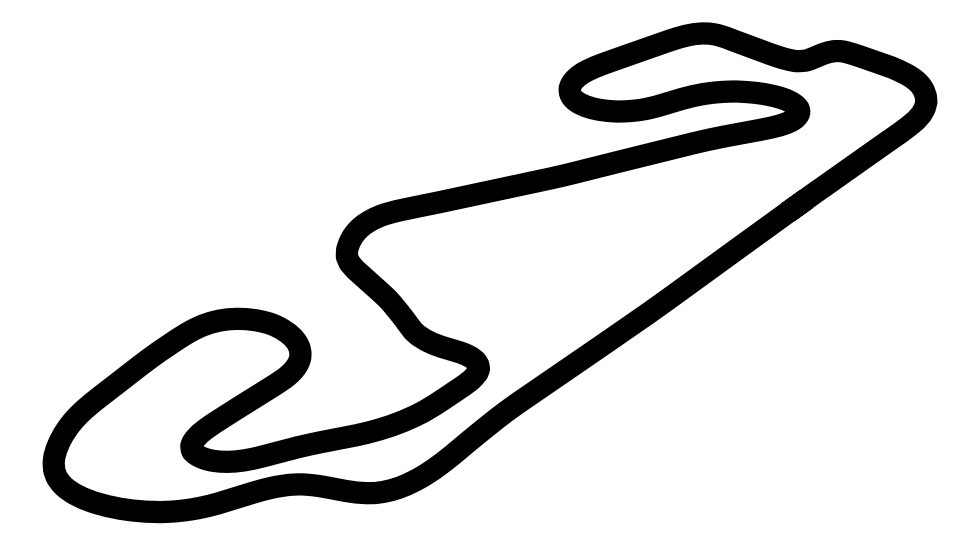

In [23]:
lap = session.laps.pick_driver("VER").pick_fastest()
telemetry = lap.telemetry
telemetry.loc[(telemetry['Distance'] > 800) & (telemetry['Distance'] < 890)]
# x = lap.telemetry['X']
# y = lap.telemetry['Y']

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(telemetry['X'], telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)
plt.show()

In [25]:
foo = telemetry.loc[(telemetry['Distance'] > 800) &
                    (telemetry['Distance'] < 890)]

In [42]:
import plotly.graph_objects as go
data = [
    go.Scatter(x=foo["X"], y=foo["Y"],
               name='VER'),

]
fig = go.Figure(data=data)
# fig.show()

# fig = px.line(foo, x="X", y="Y")

fig.show()

In [43]:
ham_lap = session.laps.pick_driver("HAM").pick_fastest()
ham_telemetry = ham_lap.telemetry
ham_telemetry_foo = ham_telemetry.loc[(ham_telemetry['Distance'] > 800) &
                                      (ham_telemetry['Distance'] < 890)]

data = [
    go.Scatter(x=foo["X"], y=foo["Y"],
               name='VER'),
    go.Scatter(x=ham_telemetry_foo["X"], y=ham_telemetry_foo["Y"],
               name='HAM'),

]
fig = go.Figure(data=data)
# fig.show()

# fig = px.line(foo, x="X", y="Y")

fig.show()

In [45]:
data = [
    go.Scatter(x=foo["Distance"], y=foo["Speed"],
               name='VER'),
    go.Scatter(x=ham_telemetry_foo["Distance"], y=ham_telemetry_foo["Speed"],
               name='HAM'),

]
fig = go.Figure(data=data)
# fig.show()

# fig = px.line(foo, x="X", y="Y")

fig.show()

In [47]:
circuit_info.corners

,X,Y,Number,Letter,Angle,Distance
0,-3728.050293,-7258.672852,1,,-73.417940,840.439503
1,-4538.213867,-7090.668945,2,,82.427713,925.219271
2,-6846.687012,-7532.823730,3,,-123.521561,1168.211321
3,-5053.705078,-3172.251709,4,,61.746705,1741.685572
4,-5760.503418,-6343.965332,5,,-151.467456,2122.736857
5,-3511.338623,-5588.651855,6,,-48.179459,2364.579753
6,-2657.036865,-4195.921875,7,,14.858653,2547.543141
7,-3287.300781,-3536.369629,8,,-147.354020,2637.109590
8,-3938.748047,-911.778870,9,,155.821148,2925.381432
9,869.164917,1933.093018,10,,13.736824,3499.034859


In [52]:
ver_sector1 = telemetry.loc[(telemetry['Distance'] < 1600)]
ham_sector1 = ham_telemetry.loc[(ham_telemetry['Distance'] < 1600)]

data = [
    go.Scatter(x=ver_sector1["Distance"], y=ver_sector1["Speed"],
               name='ver sector 1'),
    go.Scatter(x=ham_sector1["Distance"], y=ham_sector1["Speed"],
               name='ham sector 1'),
]
fig = go.Figure(data=data)
# fig.show()

# fig = px.line(foo, x="X", y="Y")

fig.show()

In [70]:
len(ver_sector1)

188

In [71]:
ver_sector1.keys()

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

In [67]:
print(f"Hamilton Sector 1 Time: {
      ham_lap['Sector1Time'].total_seconds():.3f} seconds")
print(f"Verstappen Sector 1 Time: {
      lap['Sector1Time'].total_seconds():.3f} seconds")

Hamilton Sector 1 Time: 21.798 seconds
Verstappen Sector 1 Time: 21.759 seconds
